# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# Create the Urban city DataFrame. Creating a bubble chart.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [5]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for Urban City type
# total rides for Urban City type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [13]:
# 2. total drivers for the Urban city type
total_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [14]:
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [10]:
#  3. Get the total amount of fares for the Urban city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare_by_type / total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [15]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [184]:
#  6. Create a PyBer summary DataFrame.  
pyber_data_summary_df = pd.DataFrame({
      "Total Drivers": total_drivers_by_type,
      "Total Rides": total_rides_by_type,
      "Total Fares": total_fare_by_type,
      "Average Fare Per Ride": avg_fare_per_ride,
      "Average Fare Per Driver": avg_fare_per_driver
    }) 
pyber_data_summary_df.head()

,Total Drivers,Total Rides,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,537,125,4327.93,34.623440,8.059460
Suburban,8570,625,19356.33,30.970128,2.258615
Urban,59602,1625,39854.38,24.525772,0.668675


In [19]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_data_summary_df.index.name = None

In [194]:
# pyber_data_summary_df["Total Driver"].map("{:,.2f}".format)

In [195]:
#  8. Format the columns.
# pyber_data_summary_df["Total Drivers"].map("{:,}".format),

# pyber_data_summary_df["Total Rides"].map("{:,}".format)

# pyber_data_summary_df["Total Fares"].map('${:,.2f}'.format) 

# pyber_data_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
                                      
# pyber_data_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

# pyber_data_summary_df.head()

In [ ]:
## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [34]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [36]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# Get the sum of the fares for each city type.
sum_fares_by_type_df = pyber_data_df.groupby(["type" , "date"]).sum()[["fare"]]
sum_fares_by_type_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [39]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_by_type_df.reset_index(inplace=True)
sum_fares_by_type_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [41]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_by_type_pivot = sum_fares_by_type_df.pivot(index="date", columns="type" , values="fare")

In [43]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = sum_fares_by_type_pivot.loc["2019-01-01":"2019-04-29" ]
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [44]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index)
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [45]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [46]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# df
df.resample("W").sum()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


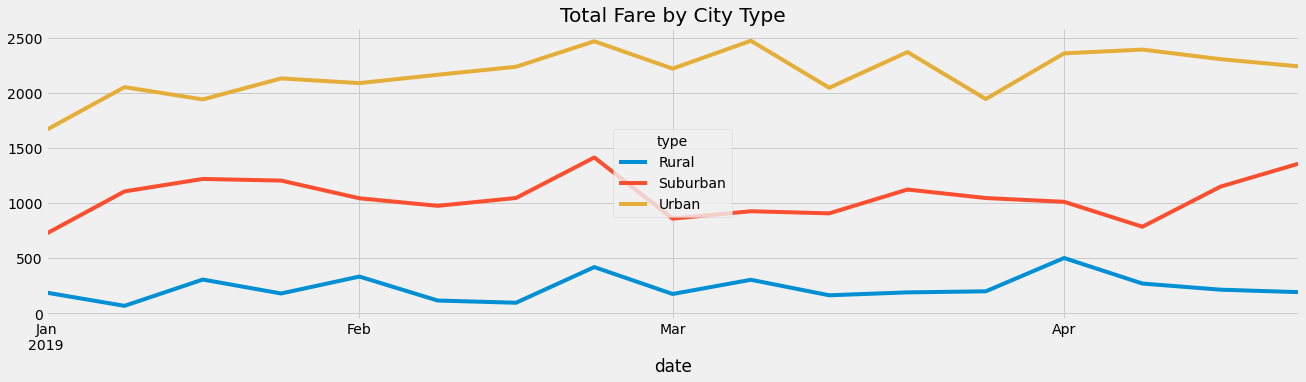

In [170]:
#### 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
import matplotlib.pyplot as plt
import numpy as np

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

ax.set_ylabel('Fare($USD)')

df.plot(title='Total Fare by City Type', figsize=(20,5))